# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Содержание методического пособия:


<ol>
<li>Что такое TensorFlow</li>
<li>Основы синтаксиса TensorFlow</li>
<li>Пример нейросети на TensorFlow</li>
</ol>

## Что такое TensorFlow

TensorFlow - это фреймворк для создания ML моделей. TensorFlow предназначен в первую очередь для Deep Learning, т.е. создания современных нейросетей. Однако в TensorFlow также есть поддержка некоторых классических ML алгоритмов: K-means clustering, Random Forests, Support Vector Machines, Gaussian Mixture Model clustering, Linear/logistic regression.

TensorFlow выпустила компания Google в 2015. TensorFlow - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. TensorFlow позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

TensorFlow применяется самой компанией Google для ее поиска, почты, переводчика, распознования голоса, внутренних нужд наподобие мониторинга оборудования. TensorFlow используется различными компаниями для различных проектов связанных с компьютерным зрением, решением задач ранжирования и т.д.


## Основы синтаксиса TensorFlow

Процесс создания нейросети на TensorFlow схож с разобранным нами процессом обучения нейросети на Keras. Отличее здесь в том, что здесь нам нужно прописать больше деталей в коде. 

Название TensorFlow означает поток тензоров. Тензоры - это массивы. Данные в компьютере предствлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа TensorFlow складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в TensorFlow в виде графов. Особенностью TensorFlow версии 1 является то, что сначала необходимо декларировать переменные и вычисления, которые будут совершенны над ними, а потом уже непосредственно запускать работу над данными. 

Давайте рассмотрим базовые вещи в синтаксисе Tensorflow 2.

Выведем строку Hello world, а также версию tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2022-07-09 17:44:54.079767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-09 17:44:54.079848: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
TensorFlow 2.0 Hello World


2022-07-09 17:44:58.468843: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-07-09 17:44:58.468891: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: mr-pf4wn2f
2022-07-09 17:44:58.468900: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: mr-pf4wn2f
2022-07-09 17:44:58.469051: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.48.7
2022-07-09 17:44:58.469084: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.48.7
2022-07-09 17:44:58.469091: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.48.7
2022-07-09 17:44:58.471836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critica

In [2]:
name = tf.constant(10)

Пример создания тензора - 

In [3]:
A = tf.constant([[3, 2], 
                 [5, 2]])

print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


In [4]:
name = tf.Variable(10)

Приме сложения тензоров - 

In [5]:
B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())

[[3 2 9 5]
 [5 2 1 3]]


Пример изменения размерности тензора - 

In [6]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


Пример умножения матриц, одной из самых частых операций в машинном обучении - 

In [7]:
A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B) # A * B
print(AB)


tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


**Constant vs variable**

Функция constant создает неизменяемые переменные; если переменной нужно будет переприсвоить за=начение в процессе работы, используется Variable

In [8]:
C = tf.Variable([[3, 7], [1, 9]])
C.assign([[0, 3], [9, 4]])

print(C)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[0, 3],
       [9, 4]], dtype=int32)>


In [9]:
tf.matmul(A, C)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[63, 37],
       [81, 39]], dtype=int32)>

Вытащить численные значения из вершины графа вычислений (был вопрос на уроке) можно конвертацией в numpy объект.

In [10]:
A[0, 0].numpy()

3

In [11]:
tf.multiply(A, B).numpy()

array([[  30,   70],
       [1000, 9000]], dtype=int32)

**Работа с вычислениями**

TF позволяет проводить вычисления как на CPU, так и на GPU, это определяет параметр device

In [12]:
print("The device which processes the variable:\n", C.device)

The device which processes the variable:
 /job:localhost/replica:0/task:0/device:CPU:0


In [13]:
tf.test.gpu_device_name()

''

In [14]:
%%time 
#with tf.device('GPU:0'):
  D = C * C
  print("The device which processes the calculation:\n", D.device)

IndentationError: unexpected indent (<unknown>, line 2)

In [ ]:
%%time
D = C * C
print("The device which processes the calculation:\n", D.device)

Функции tensorflow призваны ускорить вычисления, давайте посмотрим на следующий пример - 

# Классификация изображений одежды

Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В это датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.

В данном случае мы будем использовать High API от TensorFlow

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [16]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
len(train_labels)

60000

In [20]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_labels)

10000

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

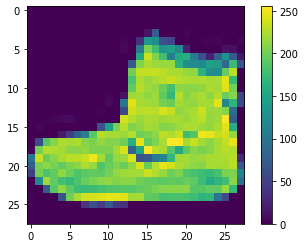

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

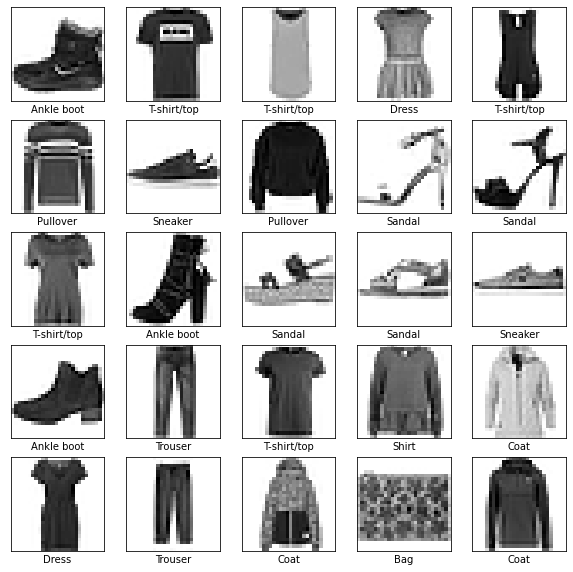

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

**А потом поговорим про Dropout!**

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
tf.keras.losses.SparseCategoricalCrossentropy?

In [29]:
tf.keras.losses.CategoricalCrossentropy?

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [30]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4986 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3730 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8790
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.8914


In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3492 - accuracy: 0.8748 - 457ms/epoch - 1ms/step

Test accuracy: 0.8748000264167786


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых даыннх и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

**Памятка о Softmax:**

$$Softmax = \frac{e^k}{\sum_i^K e^i}$$

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [32]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [34]:
predictions[0]

array([4.9769742e-06, 2.0888112e-06, 2.1288282e-07, 8.8439371e-08,
       3.0611000e-06, 1.0580833e-02, 2.0085881e-05, 1.3220875e-01,
       3.8724229e-05, 8.5714108e-01], dtype=float32)

In [35]:
np.argmax(predictions[4])

6

In [36]:
test_labels[4]

6

In [37]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

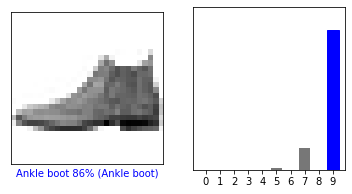

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

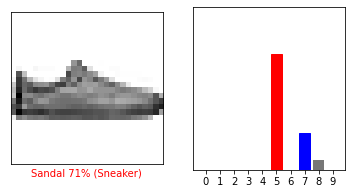

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

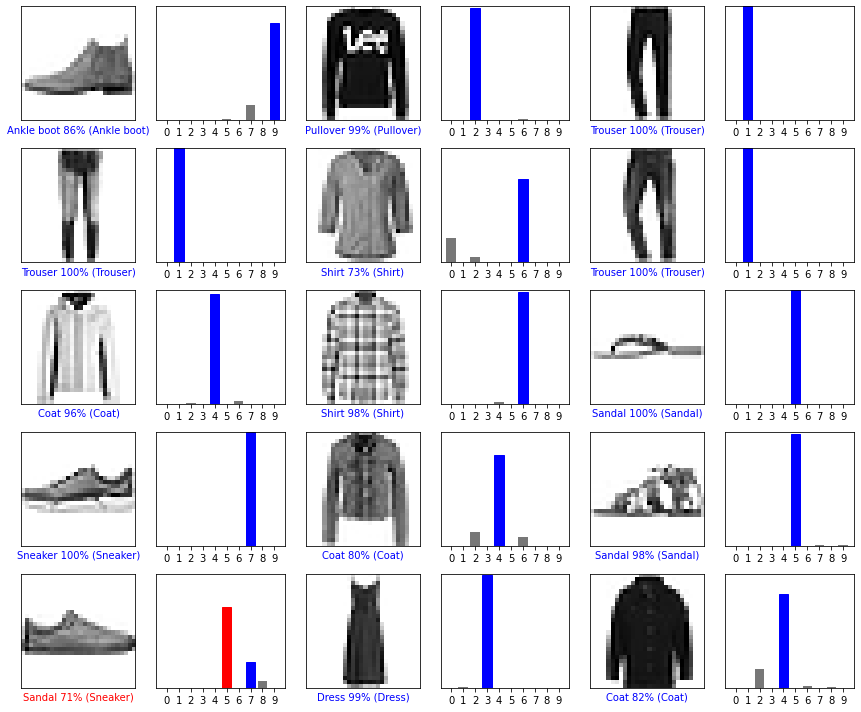

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети - 

In [41]:

img = test_images[1]

print(img.shape)

(28, 28)


In [42]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [43]:
predictions_single = probability_model.predict(test_images[:5])

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[4.9769674e-06 2.0888083e-06 2.1288233e-07 8.8439080e-08 3.0610897e-06
  1.0580798e-02 2.0085834e-05 1.3220850e-01 3.8724174e-05 8.5714149e-01]
 [1.5653279e-05 1.1004274e-12 9.8716056e-01 5.4287472e-09 1.6450605e-03
  3.8745076e-13 1.1178668e-02 8.7698488e-15 1.0825950e-07 4.6159923e-16]
 [4.0938080e-06 9.9999571e-01 5.2251083e-09 1.0150851e-07 2.5164924e-08
  4.8892666e-13 1.4139122e-08 1.6474308e-16 2.8888375e-10 1.1675146e-13]
 [2.1559670e-06 9.9996328e-01 3.4889612e-07 3.3255252e-05 8.9178747e-07
  1.1770342e-11 4.9748163e-08 1.1649743e-13 6.7322037e-10 5.0388582e-11]
 [2.1720767e-01 5.9965721e-05 4.3773513e-02 4.5748912e-03 3.1403617e-03
  1.8239366e-08 7.2923011e-01 5.4987979e-09 2.0134253e-03 4.7811778e-08]]


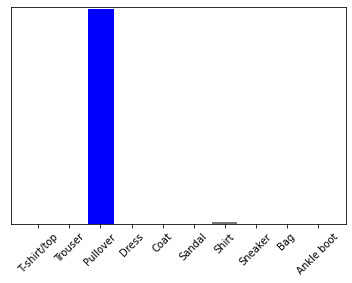

In [44]:
plot_value_array(1, predictions_single[1], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [45]:
np.argmax(predictions_single[1])

2

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание

**Dropout**

Слой, который при обучении умножает на 0 заданную долю данных, которые приходят ему на вход. Результат: борьба с переобучением, лучшая устойчивость модели.
На стадии предсказания не используется, просто пропускает через себя все данные без изменений.

In [46]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(56, activation='elu'),
    keras.layers.Dense(108, activation='relu'),
    #keras.layers.Dropout(0.15),
    keras.layers.Dense(10, activation='softmax')
])

In [47]:
model_2.compile(optimizer = 'adam',
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])

In [48]:
model_2.fit(train_images, train_labels, epochs=6)

Epoch 1/6


/home/mrb/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4868 - accuracy: 0.8222
Epoch 2/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3642 - accuracy: 0.8664
Epoch 3/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3299 - accuracy: 0.8777
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3093 - accuracy: 0.8842
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2912 - accuracy: 0.8914
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2757 - accuracy: 0.8970


In [49]:
model_2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3678 - accuracy: 0.8677


[0.3678184449672699, 0.8676999807357788]

In [134]:
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(56, activation='elu'),
    keras.layers.Dense(108, activation='relu'),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(10, activation='softmax')
])

In [135]:
model_3.compile(optimizer = 'adam',
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
model_3.fit(train_images, train_labels, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4996 - accuracy: 0.8174
Epoch 2/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3725 - accuracy: 0.8632
Epoch 3/6
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3389 - accuracy: 0.8760
Epoch 4/6
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3174 - accuracy: 0.8824
Epoch 5/6
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3001 - accuracy: 0.8879
Epoch 6/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2876 - accuracy: 0.8939


In [138]:
model_3.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.8718


[0.36567801237106323, 0.8718000054359436]

**Теперь поговорим о нормализации**

1. Batch vs Layer 
2. Работает по-разному на fit и train

In [53]:
x1, x2 = [1, 2, 3], [5, 6, 7]

layer-norm:
avg(x1) = (1 + 2 + 3) / 3 = 2
disp(x1) = sigma
x1 = (x1 - avg(x1)) / disp(x1)

batch-norm (batch size = 1):
feature1 [1, 5]
avg(f1) = (1 + 5) / 2 = 3
disp(f1) = sigma
f1 = (f1 - avg(f1)) / disp(f1)

Z-score

SyntaxError: invalid syntax (1329599265.py, line 3)

In [136]:
model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(56, activation='elu'),
    keras.layers.Dense(108, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [137]:
model_4.compile(optimizer = 'adam',
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
model_4.fit(train_images, train_labels, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4770 - accuracy: 0.8273
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3845 - accuracy: 0.8595
Epoch 3/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3526 - accuracy: 0.8696
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3321 - accuracy: 0.8764
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3123 - accuracy: 0.8835
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3024 - accuracy: 0.8876


In [139]:
model_4.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3947 - accuracy: 0.8617


[0.3946695923805237, 0.8616999983787537]

In [140]:
model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(56, activation='elu'),
    keras.layers.Dense(108, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_5.compile(optimizer = 'adam',
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
model_5.fit(train_images, train_labels, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4654 - accuracy: 0.8293
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3544 - accuracy: 0.8685
Epoch 3/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3248 - accuracy: 0.8787
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3035 - accuracy: 0.8850
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2873 - accuracy: 0.8909
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2731 - accuracy: 0.8969


In [141]:
model_5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3538 - accuracy: 0.8711


[0.35375937819480896, 0.8711000084877014]

# ДЗ

По сравнению с результатами полученными на уроке получилось улучшить результат на тестовай выборке примерно на 3%, но переобучение выросло в два раза. Можно было бы дропаутами уменьшить переобучение, но я пытался выжать 90% на тесте, что все-таки сделать получилось. может получилось бы, если еще больше усложнить модель. А так, чтобы ощутимо поднять качество пришлось и слоев докинуть и количество нейронов увеличить и кол-во эпох и размер батча.
из функций активации по итогу лучше всего себя показала relu, а из оптимизаторов adam.

In [142]:
%%time
tf.keras.utils.set_random_seed(12)

model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.LayerNormalization(),
#     keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_6.compile(optimizer = 'adam',
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
model_6.fit(train_images, train_labels, epochs=50, batch_size=256)

model_6.evaluate(test_images, test_labels)

Epoch 1/50
235/235 [==============================] - 10s 39ms/step - loss: 0.5135 - accuracy: 0.8095
Epoch 2/50
235/235 [==============================] - 9s 38ms/step - loss: 0.3714 - accuracy: 0.8652
Epoch 3/50
235/235 [==============================] - 9s 37ms/step - loss: 0.3342 - accuracy: 0.8766
Epoch 4/50
235/235 [==============================] - 9s 38ms/step - loss: 0.3052 - accuracy: 0.8883
Epoch 5/50
235/235 [==============================] - 9s 37ms/step - loss: 0.2882 - accuracy: 0.8935
Epoch 6/50
235/235 [==============================] - 9s 38ms/step - loss: 0.2770 - accuracy: 0.8965
Epoch 7/50
235/235 [==============================] - 9s 39ms/step - loss: 0.2650 - accuracy: 0.9014
Epoch 8/50
235/235 [==============================] - 9s 38ms/step - loss: 0.2531 - accuracy: 0.9056
Epoch 9/50
235/235 [==============================] - 9s 38ms/step - loss: 0.2483 - accuracy: 0.9074
Epoch 10/50
235/235 [==============================] - 9s 38ms/step - loss: 0.2388 - accur

[0.48997586965560913, 0.9010999798774719]

**Если хочется реализовать операцию, которой нет в стандартных слоях, пишут свой класс-слой, наследуя его от keras.layers.Layer**


In [59]:
class My_layer(keras.layers.Layer):
  

SyntaxError: incomplete input (2846502157.py, line 2)

In [ ]:
keras.layers.Layer?

**И еще немного о батчах**

Зачем они? Какой выбрать размер?

Вычислительные ресурсы оборудования "урезаются" за счет того, что часть памяти выделяется под хранение данных, т.е. чем больше батч, тем дольше будет одна итерация обучения модели на батче (т.к. меньше ресурсов остается на тюнинг модели).

In [ ]:
all / batch_size = k 
epoch ~ k 

Размер батча рекомендуется брать степенью 2, потому как память компьютера (GPU, CPU - неважно) организована бинарно и такой размер будет оптимальным, т.к. не оставляет ресурсов, не занятых хранением данных и вычислительными операциями.
Обычно он составляет от 32 до 512, иногда 1024 объекта

## Практическое задание

<ol>
    <li>1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. 
       Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?<br><br>
    </li>
    
    <li>2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.</li>
        
    <li>*3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность? </li>

    
    
</ol>

## Дополнительные материалы

<ol>
    <li>www.tensorflow.org/api_docs</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>